##  Test  Kaerebrum Regression with Keras and Sklearn
- test if module performs well in accuracy and speed as compare to current on-market application standards 

In [1]:
import sys
sys.path.append(r'C:/Users/User/jupyter/KaelanML/')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as SKR

from Kaerebrum.Regression import LogisticRegression, MultinomialRegression, LinearRegression

pd.options.display.max_columns = 50
np.set_printoptions(suppress= True)
%matplotlib notebook

In [2]:
# import data we need
train = pd.read_csv("C:/Users/User/jupyter/Kaggle_Projects/30 days of ML/data/train.csv",index_col=0)
target = train[['target']]

trainD= pd.get_dummies(train,drop_first=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(trainD,target , test_size=0.2, random_state= 12)

#### SKlearn Model : SGDRegressor

In [23]:
from sklearn.linear_model import SGDRegressor
sgdRegressor = SGDRegressor(
    alpha = 0.001,
    loss='squared_loss',
    max_iter=10,
    eta0 = 0.0001,
    learning_rate='constant',
)

%time sgdRegressor.fit(X_train.values,y_train.values.ravel())

Wall time: 549 ms


SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='constant', max_iter=10)

In [28]:
result = sgdRegressor.predict(X_test)

In [29]:
result

array([7.65320495, 7.25563755, 8.73729278, ..., 8.33487196, 8.53872512,
       8.45299482])

In [31]:
mean_squared_error(y_test,result,squared = False)

0.002265758481202678

In [32]:
MAPE = np.mean(np.abs((y_test.values.ravel()- result)/y_test.values.ravel()))*100
Accuracy = 100-MAPE
Accuracy

99.97796933534457

#### SKlearn Model: Linear

In [10]:
skmodel = SKR()
skmodel.fit(X_train.values,y_train.values.ravel())

LinearRegression()

In [11]:
result = skmodel.predict(X_test.values)
print(mean_squared_error(y_test,result,squared = False))

1.9690228674261394e-15


In [22]:
MAPE = np.mean(np.abs((y_test.values.ravel()- result)/y_test.values.ravel()))*100
Accuracy = 100-MAPE
Accuracy

99.99999999999999

#### Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf 

model = keras.Sequential([
      tf.keras.layers.Dense(1, use_bias=True, input_shape=(61,))
    ])
# Adam optimizer
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.001,  momentum=0.8,
    nesterov=False, name="SGD")
  
# Model compiling settings
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
%time model.fit(X_train.values, y_train.values.ravel(), epochs = 2, batch_size = 1)

Epoch 1/2
240000/240000 [==============================] - 393s 2ms/step - loss: 0.0012 - mae: 0.0050 - mse: 0.0012
Epoch 2/2
188012/240000 [======================>.......] - ETA: 1:36 - loss: 6.1378e-06 - mae: 4.6000e-04 - mse: 6.1378e-06

In [ ]:
kresult = model.predict(X_test.values)
mean_squared_error(y_test,kresult,squared = False)

In [ ]:
MAPE = np.mean(np.abs((y_test.values.ravel()- kresult.ravel())/y_test.values.ravel()))*100
Accuracy = 100-MAPE
Accuracy

#### Karerebrum Regression: SGD

No of iterations/ n_iters: 10
Learning rate/ alpha: 0.001
Lamda/ ld: 0
Loss Function: L2
Regularization: L2
Shuffle data on each iteration: True
Batch size: 1
Momentum: 0.8
Optimizing Function: (Mini-Batch)Stocastic Descent with Momentum


<IPython.core.display.Javascript object>


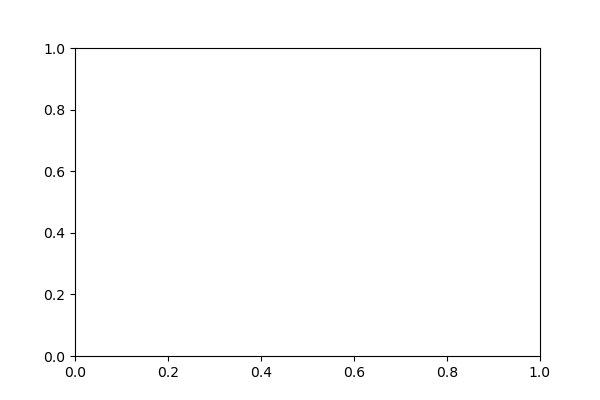


Converged at threshold:0.001, epoch:2

Min Cost: 5.954771139899697e-11
Cost: 5.954771139899697e-11
Wall time: 43.1 s


In [6]:
sgd = LinearRegression(alpha = 0.001,n_iters = 10)
%time sgd.sgd_fit(X_train,y_train,batch = 1, threshold=1e-03,momentum=0.8,rand = True)

In [8]:
Predict_sgd = sgd.predict(X_test.values, y_test.values)             
mean_squared_error(y_test,Predict_sgd,squared = False)

1.0531321202476165e-05

In [9]:
sgd.metrics()

R2 = 0.9999999997985327
R2_adjusted = 0.9999999997983277
MAE = 5.183575177252006e-06
MSE = 1.1090872626972403e-10
RMSE = 1.0531321202476165e-05
MAPE = 6.202636328624292e-05
Accuracy = 99.99993797363672 %


(0.9999999997985327,
 0.9999999997983277,
 5.183575177252006e-06,
 1.1090872626972403e-10,
 1.0531321202476165e-05,
 6.202636328624292e-05,
 99.99993797363672)

#### Karerebrum Regression: Full batch 

In [40]:
batch = LinearRegression(alpha = 0.001,n_iters = 10000)
%time batch.fit(X_train,y_train,threshold=1e-05, rand=False)

No of iterations/ n_iters: 10000
Learning rate/ alpha: 0.001
Lamda/ ld: 0
Loss Function: L2
Regularization: L2
Shuffle data on each iteration: False
Optimizing Function: Gradient Descent
Iteration 10000 running, Current cost: 0.0006253936386166573
Min Cost: 0.0006252766911000622
Cost: 0.0006252766911000622
Wall time: 2min 25s


In [50]:
Predict_batch = batch.predict(X_test.values,y_test.values)               
mean_squared_error(y_test,Predict_batch,squared = False)

0.035169909339403206

In [51]:
batch.metrics()

R2 = 0.9977531119546785
R2_adjusted = 0.9977508252555767
MAE = 0.027935799509644546
MSE = 0.001236922522941841
RMSE = 0.035169909339403206
MAPE = 0.3455890043386984
Accuracy = 99.65441099566131 %


(0.9977531119546785,
 0.9977508252555767,
 0.027935799509644546,
 0.001236922522941841,
 0.035169909339403206,
 0.3455890043386984,
 99.65441099566131)

#### Karerebrum Regression: Newton Method

In [14]:
scipy = LinearRegression()
%time scipy.scipy_fit(X_train,y_train)



No of iterations/ n_iters: 1000
Learning rate/ alpha: 0.01
Lamda/ ld: 0
Loss Function: L2
Regularization: L2
Shuffle data on each iteration: False
Scipy optimise: TNC

Min Cost: 3.170971082608648e-08
Cost: 3.170971082608648e-08
Wall time: 1.73 s


In [15]:
Predict_batch = scipy.predict(X_test.values,y_test.values)               
mean_squared_error(y_test,Predict_batch,squared = False)

0.0002036251753866365

In [16]:
scipy.metrics()

R2 = 0.9999999246814625
R2_adjusted = 0.9999999246048095
MAE = 4.12145604151799e-05
MSE = 4.146321205123848e-08
RMSE = 0.0002036251753866365
MAPE = 0.0005046695553352634
Accuracy = 99.99949533044466 %


(0.9999999246814625,
 0.9999999246048095,
 4.12145604151799e-05,
 4.146321205123848e-08,
 0.0002036251753866365,
 0.0005046695553352634,
 99.99949533044466)

#### Karerebrum Regression: Adam

In [17]:
adam = LinearRegression(alpha = 0.001, n_iters = 10)
%time adam.adam_fit(X_train,y_train,batch = 1, momentum = 0.9,gamma = 0.95, threshold=1e-03, opt = 'adam', rand = False)

No of iterations/ n_iters: 10
Learning rate/ alpha: 0.001
Lamda/ ld: 0
Loss Function: L2
Regularization: L2
Shuffle data on each iteration: False
Batch size: 1
Momentum: 0.9
Gamma: 0.95
Optimizing Function: adam

Converged at threshold:0.001, epoch:3

Min Cost: 8.100806102731566e-06
Cost: 8.100806102731566e-06
Wall time: 43.8 s


In [18]:
adampred = adam.predict(X_test,y_test)           
mean_squared_error(y_test,adampred,squared = False)

0.004017982384571805

In [19]:
adam.metrics()

R2 = 0.9999706738539729
R2_adjusted = 0.9999706440082171
MAE = 0.0030819694516289937
MSE = 1.6144182442729323e-05
RMSE = 0.004017982384571805
MAPE = 0.037713849824618846
Accuracy = 99.96228615017539 %


(0.9999706738539729,
 0.9999706440082171,
 0.0030819694516289937,
 1.6144182442729323e-05,
 0.004017982384571805,
 0.037713849824618846,
 99.96228615017539)